In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yf

In [4]:
df = yf.download('AAPL', start='2012-01-01', end='2022-11-30')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519278,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586556,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859332,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838938,394024400
...,...,...,...,...,...,...
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400
2022-11-25,148.309998,148.880005,147.119995,148.110001,148.110001,35195900


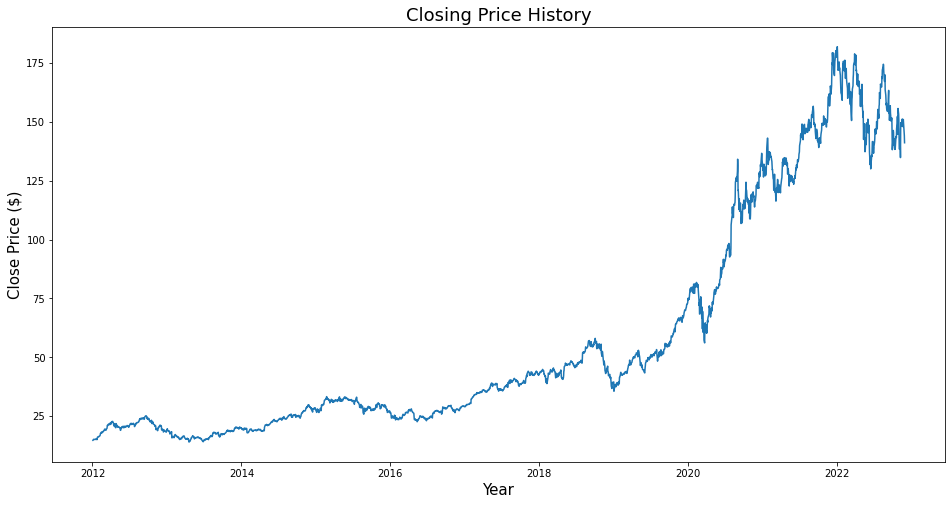

In [6]:
plt.figure(figsize =(16,8))
plt.plot(df['Close'])
plt.title('Closing Price History', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Close Price ($)', fontsize=15)
plt.show()

# Preparing data for the deep learning model

In [7]:
close_values = df['Close'].values

In [8]:
close_values = close_values.reshape(len(close_values),1)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(close_values)
scaled

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.79828936],
       [0.77514321],
       [0.75699518]])

In [10]:
scaled.shape

(2746, 1)

In [11]:
X = []
y = []

time_steps = 60
for i in range(len(scaled) - time_steps - 1):
  X.append(scaled[i:(i+time_steps),0])
  y.append(scaled[i+time_steps,0])

In [12]:
X = np.array(X)
X

array([[0.00439887, 0.00486851, 0.00584391, ..., 0.04599691, 0.04759072,
        0.04825798],
       [0.00486851, 0.00584391, 0.00677256, ..., 0.04759072, 0.04825798,
        0.04660893],
       [0.00584391, 0.00677256, 0.00663019, ..., 0.04825798, 0.04660893,
        0.044418  ],
       ...,
       [0.86255118, 0.85249539, 0.85689854, ..., 0.81721085, 0.7976943 ,
        0.81060616],
       [0.85249539, 0.85689854, 0.84410563, ..., 0.7976943 , 0.81060616,
        0.81590189],
       [0.85689854, 0.84410563, 0.83648942, ..., 0.81060616, 0.81590189,
        0.79828936]])

In [13]:
X.shape

(2685, 60)

In [14]:
y = np.array(y)
y

array([0.04660893, 0.044418  , 0.04847262, ..., 0.81590189, 0.79828936,
       0.77514321])

In [15]:
y.shape

(2685,)

In [16]:
df['Close']

Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2022-11-22    150.179993
2022-11-23    151.070007
2022-11-25    148.110001
2022-11-28    144.220001
2022-11-29    141.169998
Name: Close, Length: 2746, dtype: float64

In [17]:
list = [str([i for i in range(j-60,j)]) for j in range(60, len(X)+61)]

pd.DataFrame({
    'X' : list,
    'y' : [i+61 for i in range(len(list))]
})

,X,y
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",61
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",62
2,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",63
3,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",64
4,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...",65
...,...,...
2681,"[2681, 2682, 2683, 2684, 2685, 2686, 2687, 268...",2742
2682,"[2682, 2683, 2684, 2685, 2686, 2687, 2688, 268...",2743
2683,"[2683, 2684, 2685, 2686, 2687, 2688, 2689, 269...",2744
2684,"[2684, 2685, 2686, 2687, 2688, 2689, 2690, 269...",2745


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, shuffle=False)

In [20]:
y_train

array([0.04660893, 0.044418  , 0.04847262, ..., 0.60175533, 0.60110081,
       0.61300114])

In [21]:
X_train.shape

(2148, 60)

In [22]:
X_test.shape

(537, 60)

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [24]:
X_train.shape

(2148, 60, 1)

# **Model**

In [25]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60,1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

In [28]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)

Epoch 1/10
68/68 [==============================] - 12s 116ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 2/10
68/68 [==============================] - 9s 132ms/step - loss: 2.0854e-04 - val_loss: 0.0037
Epoch 3/10
68/68 [==============================] - 9s 136ms/step - loss: 2.5570e-04 - val_loss: 0.0013
Epoch 4/10
68/68 [==============================] - 6s 82ms/step - loss: 1.8008e-04 - val_loss: 0.0014
Epoch 5/10
68/68 [==============================] - 4s 63ms/step - loss: 1.7464e-04 - val_loss: 0.0011
Epoch 6/10
68/68 [==============================] - 5s 67ms/step - loss: 1.5306e-04 - val_loss: 9.4994e-04
Epoch 7/10
68/68 [==============================] - 5s 69ms/step - loss: 2.2449e-04 - val_loss: 0.0011
Epoch 8/10
68/68 [==============================] - 5s 67ms/step - loss: 1.3815e-04 - val_loss: 0.0022
Epoch 9/10
68/68 [==============================] - 4s 60ms/step - loss: 1.3587e-04 - val_loss: 0.0011
Epoch 10/10
68/68 [==============================] - 4s 65ms/step - l

# Predictions for Test set

In [29]:
X_test.shape

(537, 60)

In [30]:
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 2s 17ms/step


In [31]:
predictions = predictions.reshape(predictions.shape[0],)

In [32]:
predictions

array([115.24382 , 116.341034, 117.45936 , 118.531   , 119.44434 ,
       120.03465 , 120.10771 , 119.97704 , 119.65487 , 119.136246,
       118.47161 , 117.765274, 117.21746 , 116.34612 , 115.70824 ,
       114.70067 , 113.55324 , 112.543564, 112.07682 , 112.33188 ,
       113.00211 , 113.70003 , 114.345314, 115.20746 , 116.10545 ,
       116.96461 , 117.82103 , 118.525375, 118.96135 , 119.24405 ,
       119.286514, 118.872154, 118.31866 , 117.78111 , 117.33867 ,
       117.2014  , 117.579   , 118.28159 , 119.13207 , 119.95464 ,
       120.82577 , 121.7053  , 122.29118 , 122.775276, 123.07169 ,
       123.16867 , 123.65705 , 124.325714, 125.13922 , 125.800606,
       126.45476 , 127.359024, 128.25371 , 129.16277 , 130.41524 ,
       131.60538 , 132.56543 , 133.20786 , 133.29982 , 133.17648 ,
       132.51756 , 131.96127 , 131.58679 , 131.08379 , 130.53737 ,
       130.18774 , 129.80786 , 129.29393 , 128.80212 , 128.72627 ,
       129.33131 , 130.50734 , 132.29834 , 134.35587 , 136.326

In [33]:
len(predictions)

537

In [34]:
df_train = df.iloc[0:len(X_train)+60]
df_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519278,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586556,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859332,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838938,394024400
...,...,...,...,...,...,...
2020-10-05,113.910004,116.650002,113.550003,116.500000,114.919807,106243800
2020-10-06,115.699997,116.120003,112.250000,113.160004,111.625122,161498200
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.519081,96849000


In [35]:
df_test = df.iloc[-len(X_test):]
df_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-13,125.269997,125.389999,119.650002,121.099998,119.457428,262330500
2020-10-14,121.000000,123.029999,119.620003,121.190002,119.546196,150712000
2020-10-15,118.720001,121.199997,118.150002,120.709999,119.072723,112559200
2020-10-16,121.279999,121.550003,118.809998,119.019997,117.405640,115393800
2020-10-19,119.959999,120.419998,115.660004,115.980003,114.406883,120639300
...,...,...,...,...,...,...
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400
2022-11-25,148.309998,148.880005,147.119995,148.110001,148.110001,35195900


In [36]:
df_pred = pd.DataFrame({
    'Date' : df_test.index,
    'Close' : predictions
})

In [37]:
df_pred = df_pred.set_index('Date')

In [38]:
df_pred

,Close
Date,
2020-10-13,115.243820
2020-10-14,116.341034
2020-10-15,117.459358
2020-10-16,118.530998
2020-10-19,119.444344
...,...
2022-11-22,145.913025
2022-11-23,146.826874
2022-11-25,147.632080


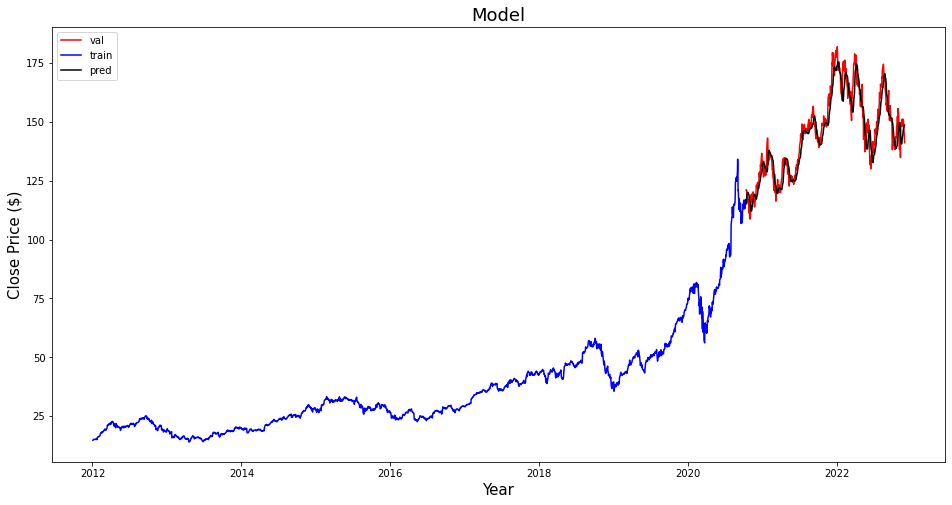

In [106]:
plt.figure(figsize =(16,8))
plt.plot(df_test['Close'], color='red')
plt.plot(df_train['Close'], color='blue')
plt.plot(df_pred['Close'], color='black')
plt.title('Model', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Close Price ($)', fontsize=15)
plt.legend(['val', 'train', 'pred'])
plt.show()

# **Predictions for Future**

In [72]:
model.predict(scaled[-60:].reshape(1, 60, 1))[0][0]

1/1 [==============================] - 0s 24ms/step


0.7950025

In [69]:
arr = scaled[-60:]

In [141]:
data_new = arr.reshape(-1).tolist()

#num of predictions
x=1000

for i in range(x):
  data_new.append(model.predict(np.array(data_new[-60:]).reshape(-1,1).reshape(1, 60, 1), verbose=0)[0][0])

In [142]:
pred_new = scaler.inverse_transform(np.array(data_new).reshape(-1,1)).reshape(-1)

In [143]:
pred_new = pred_new[-x:]

In [144]:
pred_new

array([147.55760671, 146.91481627, 146.38621308, 145.93249928,
       145.52823089, 145.15573739, 144.80283774, 144.4618086 ,
       144.1279218 , 143.79838251, 143.47192855, 143.14794886,
       142.82634328, 142.50736222, 142.1912361 , 141.87838564,
       141.56914141, 141.26367371, 140.96228304, 140.66514973,
       140.37242404, 140.08421615, 139.80056613, 139.52150404,
       139.24701986, 138.97718371, 138.71185534, 138.45107484,
       138.19482215, 137.94297708, 137.69548953, 137.45230943,
       137.2133366 , 136.97852094, 136.74781239, 136.5210807 ,
       136.29828581, 136.07931754, 135.86408571, 135.65258033,
       135.44463109, 135.24022798, 135.0392608 , 134.84162938,
       134.64728364, 134.45620354, 134.26824885, 134.08335944,
       133.90153533, 133.7226463 , 133.54662221, 133.373423  ,
       133.20296853, 133.03517867, 132.87006343, 132.70749258,
       132.54746613, 132.38987388, 132.23470582, 132.08186178,
       131.93133173, 131.78308563, 131.63704334, 131.49

In [145]:
df_new = df[['Close']]
df_new

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2022-11-22,150.179993
2022-11-23,151.070007
2022-11-25,148.110001


In [146]:
df_pred_new = pd.DataFrame({
    'Close' : pred_new
})

In [147]:
df_pred_new

,Close
0,147.557607
1,146.914816
2,146.386213
3,145.932499
4,145.528231
...,...
995,118.576611
996,118.576551
997,118.576501
998,118.576431


In [148]:
temp = pd.concat([df_new, df_pred_new], axis=0, ignore_index=True)

In [154]:
temp

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786
...,...
3741,118.576611
3742,118.576551
3743,118.576501
3744,118.576431


In [149]:
df.iloc[-6:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400
2022-11-25,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800


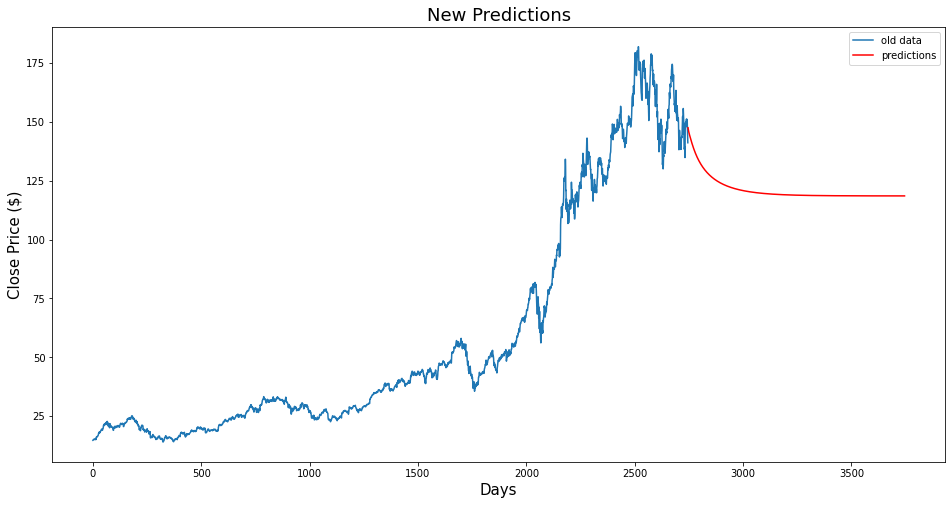

In [155]:
plt.figure(figsize =(16,8))
plt.plot(temp['Close'][:len(df_new)])
plt.plot(temp['Close'][len(df_new):], color = 'red')
plt.title('New Predictions', fontsize=18)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Close Price ($)', fontsize=15)
plt.legend(['old data', 'predictions'])
plt.show()